# Question 1

- How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Suppose we have two matrices, matix $A$ of dimension $(n,k)$ and matrix B of dimension $(k,m)$.
By multiplying matrix A and B, we will get a resultant matrix $C$ of dimension $(n,m)$.

We can calculate the number of multiplication and addition required to perform a matrix multiplication between $A$ and $B$ by analyzing each step involved:

### Number of multiplication
- For getting $C{ij}$ element of resultant matrix $C$, we multiply row i of matrix $A$ with column j of matrix $B$ element-wise and add them. Since there are $k$ elements in each row and column of matrix $A$ and $B$ respectively, number of multiplication required to get $C{ij}$ element of matrix $C$ is $k$.
- There are $n\times m$ elements in resultant matrix. So, total number of multiplication performed is $n\times m\times k$.

### Number of addition
- For getting $C{ij}$ element of resultant matrix $C$, we multiply row i of matrix $A$ with column j of matrix B element-wise and add them. Since there are $k$ elements in each row and column of matrix A and B respectively, number of addition required to get $C{ij}$ element of matrix $C$ is $(k-1)$.
- There are $n\times m$ elements in resultant matrix. So, total number of addition performed is $n\times m\times (k-1)$.


# Question 2

- Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

### Python code to multiply two matrices

NumPy matrix multiplication is faster than a loop-based approach $O(n^3)$ because it is implemented in C, takes advantage of hardware optimizations, and uses optimized algorithms specifically designed for matrix multiplication. Note, numpy matrix multiplication can be significantly fast for higher values of n and it is even possible that for smaller values of n, the naive approach is faster as numpy method might have some overhead.

In [40]:
import numpy as np
n = 10
k = 15
m = 12
np.random.seed(0)
m1 =  np.random.randint(low =1000, high = 10000,size = (n,k))
np.random.seed(1)
m2 = np.random.randint(low =1000, high =10000, size = (k,m))
#print(m1)
#print(m2)

In [41]:
#matrix multiplication using list of lists
import time
p=np.zeros((n,m))
def matrix_mul(m1,m2):
  for i in range(0, n):
      for j in range(0, m):
          for l in range(0, k):
              p[i][j] += m1[i][l] * m2[l][j]
time1 = 0
std_dev = 0
for i in range(1000):
  start = time.perf_counter()
  matrix_mul(m1,m2)
  end = time.perf_counter()
  time1+=end-start
  std_dev+= (end-start)**2
time1 = time1/1000
std_dev = std_dev/1000
std_dev = np.sqrt((std_dev - time1**2))*10**6
time1 = time1*(10**6)
print('Mean time for list of list matrix multiplication is ' + str(time1) +' milliseconds')
print('The std_dev is '+ str(std_dev) +'milliseconds')


Mean time for list of list matrix multiplication is 1531.6414999942936 milliseconds
The std_dev is 80.86027223582973milliseconds


In [42]:
#matrix multiplication using numpy
time_array = np.zeros((1000,))
for i in range(1000):
  start1 = time.perf_counter()
  q = np.matmul(m1,m2)
  end1 = time.perf_counter()
  time_array[i] = end1-start1
print('Mean time for numpy inbuilt matrix multiplication is ' + str(time_array.mean()*(10**6)) +' milliseconds')
print('The std_dev is '+ str(time_array.std()*(10**6))+' milliseconds')

Mean time for numpy inbuilt matrix multiplication is 3.248699998948723 milliseconds
The std_dev is 1.2505272121475217 milliseconds


From the above results, we can observe that, computing multiplication of matrices using numpy is faster than using lists. 
This can be attributed to the following reasons:
1. Lists involve non-contiguous memory allocation whereas arrays involve contiguous memory allocation (saves time).
2. Some tasks may be executed parallely in case of numpy.
3. Effective use of cache in numpy compared to lists.
4. The efficiency of NumPy comes from its ability to perform operations on entire arrays at once, leveraging highly optimized C.
5. The list of lists approach in Python involves nested loops and individual element-wise operations, which are slower compared to the optimized array operations in NumPy.

# Question 3

- Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?


Using this method the time complexity of finding the median would be $O(n^2)$, as we will be going through the entire array $n/2$ times and each pass has $O(n)$ time complexity. The naive approach with the worst time complexity of $O(n\cdot log(n))$. In this approach, we sort the array and if number of elements is even then average of $A[n//2]$ and $A[n//2+1]$ and if odd number of elements then median will be $A[n//2+1]$. The other approach is of average $O(n)$ runtime. Note, this approach has a worst time complexity of $O(n^2)$, hence we won't look into it.

In [43]:
#O(n**2)
np.random.seed(3)
a = list(np.random.randint(low = 1, high = 30, size = (10,)))
# print(a)
def middle_element(a):
  n = len(a)
  if(n%2==0):
    max = n//2
    while(max>=0):
      p = 0
      for i in range(len(a)):
        if(a[i]>p):
          p = a[i]
      a.remove(p)
      if(max==1):
        q = p
      max-=1
    return((p+q)/2)
  else:
    max = n//2 -1
    while(max>=0):
      p =0
      for i in range(len(a)):
        if(a[i]>p):
          p =a[i]
      a.remove(p)
      max-=1
    return p
ans = middle_element(a)
print(ans)

15.5


In [44]:
#using inbuilt sort
np.random.seed(3)
a = list(np.random.randint(low = 1, high = 30, size = (10,)))
def sort_median(a):
  n = len(a)
  a = sorted (a)
  if (n%2==0):
    return ((a[n//2-1]+a[n//2])/2)
  else:
    return a[n//2-1]
ans = sort_median(a)
ans


15.5

In [45]:
#using numpy
np.random.seed(3)
a = list(np.random.randint(low = 1, high = 30, size = (10,)))
ans = np.median(a)
ans

15.5

In [46]:
# time analysis
time1 = np.zeros((1000,))
time2 = np.zeros((1000,))
time3 = np.zeros((1000,))

for i in range(1000):

  np.random.seed(3)
  a = list(np.random.randint(low = 1, high = 10000, size = (100,)))
  start = time.perf_counter()
  middle_element(a)
  end = time.perf_counter()
  time1[i] = end-start

  np.random.seed(3)
  a = list(np.random.randint(low = 1, high = 10000, size = (100,)))
  start2 = time.perf_counter()
  sort_median(a)
  end2 = time.perf_counter()
  time2[i] = end2-start2

  np.random.seed(3)
  a = list(np.random.randint(low = 1, high = 10000, size = (100,)))
  start3 = time.perf_counter()
  np.median(a)
  end3 = time.perf_counter()
  time3[i] = end3-start3

print("The mean time for O(n^2) approach is "+str(time1.mean())+" seconds")
print("The std for O(n^2) approach is "+str(time1.std())+" seconds")

print("The mean time for O(nlog(n)) approach is "+str(time2.mean())+" seconds")
print("The std for O(nlog(n)) approach is "+str(time2.std())+" seconds")

print("The mean time for inbuilt median approach is "+str(time3.mean())+" seconds")
print("The std for inbuilt median approach is "+str(time3.std())+" seconds")

The mean time for O(n^2) approach is 0.00019243210000468024 seconds
The std for O(n^2) approach is 1.838185570382012e-05 seconds
The mean time for O(nlog(n)) approach is 1.2008299996978167e-05 seconds
The std for O(nlog(n)) approach is 1.8226302751294969e-06 seconds
The mean time for inbuilt median approach is 2.5849000008292933e-05 seconds
The std for inbuilt median approach is 1.3763535850769135e-05 seconds


We can observe that the optimal method of finding median is using inbuilt sort. 

Run time of optimal method used = $O(nlogn)2)$

# Question 4

- What is the gradient of the following function with respect to x and y?

Given function in terms of x and y is $f = x^2y + y^3sin(x)$

Gradient of $f$ with respect to x:

$\partial f / \partial x = 2xy + y^3 cos(x)$

Gradient of $f$ with respect to y:

$\partial f / \partial y = x^2 + 3y^2 sin(x)$

# Question 5

- Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [49]:
pip install jax jaxlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\priya\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [51]:
import random
import jax
import jax.numpy as npy
def x_grad(x, y):
    return 2*x*y + (y**3)*npy.cos(x)

def y_grad(x, y):
    return (x**2)+ 3*(y**2)*npy.sin(x)

def function(x, y):
    return (x**2)*y + (y**3)*npy.sin(x)
  

gradx_jax = jax.grad(function, 0)

grady_jax = jax.grad(function, 1)

x = random.random()
y = random.random()

gradx_manual = x_grad(x, y)
grady_manual = y_grad(x, y)
print("Manual")
print("Gradient w.r.t x = ", gradx_manual, "Gradient w.r.t y = ", grady_manual)
print("JAX")
print("Gradient w.r.t x = ",gradx_jax(x, y), "Gradient y = ",grady_jax(x, y))



Manual
Gradient w.r.t x =  0.2709555 Gradient w.r.t y =  0.21522313
JAX
Gradient w.r.t x =  0.2709555 Gradient y =  0.21522313


# Question 6

- Use sympy to confirm that you obtain the same gradient analytically.

In [52]:
import sympy as sp
x, y = sp.symbols('x, y')
f = (x**2)*y + (y**3)*(sp.sin(x))
print("x gradient = ", sp.diff(f, x))
print("y gradient = ", sp.diff(f, y))

x gradient =  2*x*y + y**3*cos(x)
y gradient =  x**2 + 3*y**2*sin(x)


# Question 7

- Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [53]:
records = {2022:{"Branch 1":{"Roll Number": 1, 
                                  "Name":"std1",  
                                  "Marks":{"Maths": 88, "English": 66} }, 
                      "Branch 2":{"Roll Number": 2, 
                                  "Name":"std1",  
                                  "Marks":{"Maths": 90, "English": 56} }}, 
                
               2023: {"Branch 1":{"Roll Number": 3, 
                                  "Name":"std1",  
                                  "Marks":{"Maths": 36, "English": 98} }, 
                      "Branch 2":{"Roll Number": 4, 
                                  "Name":"std2",  
                                  "Marks":{"Maths": 70, "English": 67} }},
                
               2024: {"Branch 1":{"Roll Number": 5, 
                                  "Name":"std3",  
                                  "Marks":{"Maths": 84, "English": 88} }, 
                      "Branch 2":{"Roll Number": 6, 
                                  "Name":"std4",  
                                  "Marks":{"Maths": 97, "English": 97} }}, 
                
               2025: {"Branch 1":{"Roll Number": 7, 
                                  "Name":"std5",  
                                  "Marks":{"Maths": 60, "English": 79} }, 
                      "Branch 2":{"Roll Number": 8, 
                                  "Name":"std6",  
                                  "Marks":{"Maths": 75, "English": 85} }}}
print(records)

# Accessing information
print("Student name in 2022, Branch 1, Roll Number 100:", records[2022]["Branch 1"]["Name"])
print("Maths marks in 2022, Branch 1, Roll Number 100:", records[2022]['Branch 1']['Marks']['Maths'])


{2022: {'Branch 1': {'Roll Number': 1, 'Name': 'std1', 'Marks': {'Maths': 88, 'English': 66}}, 'Branch 2': {'Roll Number': 2, 'Name': 'std1', 'Marks': {'Maths': 90, 'English': 56}}}, 2023: {'Branch 1': {'Roll Number': 3, 'Name': 'std1', 'Marks': {'Maths': 36, 'English': 98}}, 'Branch 2': {'Roll Number': 4, 'Name': 'std2', 'Marks': {'Maths': 70, 'English': 67}}}, 2024: {'Branch 1': {'Roll Number': 5, 'Name': 'std3', 'Marks': {'Maths': 84, 'English': 88}}, 'Branch 2': {'Roll Number': 6, 'Name': 'std4', 'Marks': {'Maths': 97, 'English': 97}}}, 2025: {'Branch 1': {'Roll Number': 7, 'Name': 'std5', 'Marks': {'Maths': 60, 'English': 79}}, 'Branch 2': {'Roll Number': 8, 'Name': 'std6', 'Marks': {'Maths': 75, 'English': 85}}}}
Student name in 2022, Branch 1, Roll Number 100: std1
Maths marks in 2022, Branch 1, Roll Number 100: 88


# Question 8

- Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [54]:
class year:
  def __init__(self, years, branch):
    self.years= years
    self.branch = branch

class Branch:
  def __init__(self, branch, student_data):
    self.branch = branch
    self.student_data = student_data

class Data:
  def __init__(self, Roll_num, Name, Marks):
    self.Roll_num = Roll_num
    self.Name = Name
    self.Marks= Marks


Database = [year(2022, [Branch("Branch 1", [Data(100, "cat1", {"Eng": 86, "Social": 65})]), Branch("Branch 2", [Data(101, "dog1", {"Eng": 76, "Social": 65})])]), 
            year(2023, [Branch("Branch 1", [Data(102, "cat2", {"Eng": 89, "Social": 93})]), Branch("Branch 2", [Data(103, "dog2", {"Eng": 84, "Social": 83})])]),
            year(2024, [Branch("Branch 1", [Data(104, "cat3", {"Eng": 23, "Social": 67})]), Branch("Branch 2", [Data(105, "dog3", {"Eng": 73, "Social": 65})])]),
            year(2025, [Branch("Branch 1", [Data(106, "cat4", {"Eng": 84, "Social": 82})]), Branch("Branch 2", [Data(107, "dog4", {"Eng": 56, "Social": 85})])]),
            year(2026, [Branch("Branch 1", [Data(108, "cat5", {"Eng": 90, "Social": 63})]), Branch("Branch 2", [Data(109, "dog5", {"Eng": 74, "Social": 87})])])]

print(Database[1].branch[0].student_data[0].Marks)

{'Eng': 89, 'Social': 93}


# Question 9

- Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

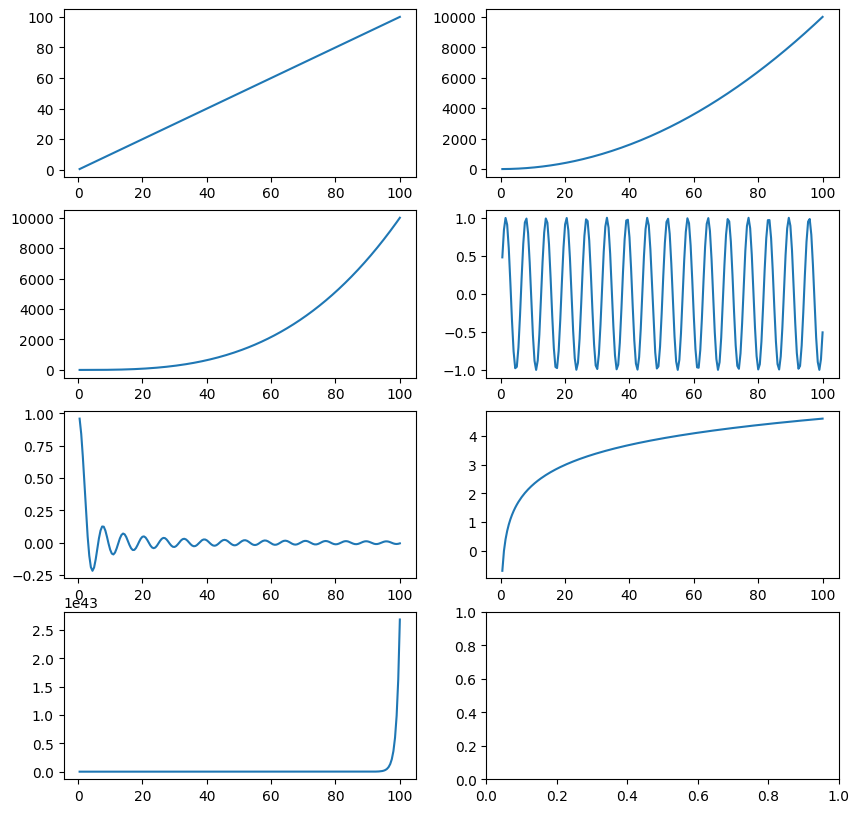

In [55]:
import matplotlib.pyplot as plt
x = np.linspace(0.5, 100,200)
f1 = x
f2 = x**2
f3 = x**3/100
f4 = np.sin(x)
f5 = np.sin(x)/x
f6 = np.log(x)
f7 = np.exp(x)
fig, axs = plt.subplots(4,2, figsize = (10,10))
axs[0,0].plot(x,f1, label = 'f1')
axs[0,1].plot(x,f2, label = 'f2')
axs[1,0].plot(x,f3, label = 'f3')
axs[1,1].plot(x,f4, label = 'f4')
axs[2,0].plot(x,f5, label ='f5')
axs[2,1].plot(x,f6, label = 'f6')
axs[3,0].plot(x,f7, label = 'f7')


# Question 10

- Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [56]:
import pandas as pd
m = 20
n = 5
Col_name= ["a", "b", "c", "d", "e"]
Matrix = np.random.uniform(1, 2, size= (m, n))

#print(Matrix)

df = pd.DataFrame(Matrix, columns= ["a", "b", "c", "d", "e"])
print(df)

#standard deviation
sd = []
for i in range(n):
    column =[]
    for j in range(m):
        column.append(Matrix[j][i])
    column = np.array(column)
    sd.append(np.std(column))
print(sd)
sd = list(sd)
max_sd = max(sd)
print(max_sd)

for i in range(n):
    if (max_sd==sd[i]):
        index_sd = i
        break

print("Column with highest standard deviation is ",Col_name[index_sd], " and highest standard deviation is", max_sd)

#Mean
Mean=[]
for i in Matrix:
    Mean.append(sum(i)/5)
    
low_mean = min(Mean)
for i in range(20):
    if Mean[i]==low_mean:
        index_mean = i
        break
        
print("Row with least mean is ", index_mean, " and the least mean is ", low_mean)


           a         b         c         d         e
0   1.187815  1.952101  1.681612  1.541020  1.707181
1   1.263887  1.926726  1.839193  1.726319  1.480240
2   1.842103  1.744752  1.660326  1.913975  1.633666
3   1.365941  1.552845  1.196381  1.192072  1.725670
4   1.784937  1.972098  1.850971  1.543594  1.089791
5   1.488873  1.927936  1.787618  1.485094  1.455279
6   1.217986  1.177213  1.073624  1.892393  1.640177
7   1.143332  1.414127  1.049109  1.209373  1.730708
8   1.651123  1.478978  1.274781  1.652223  1.956450
9   1.435521  1.070133  1.057731  1.082871  1.959707
10  1.540761  1.837462  1.170034  1.260345  1.691978
11  1.895570  1.340688  1.064673  1.864120  1.290872
12  1.741082  1.158034  1.694963  1.841420  1.727152
13  1.359108  1.726690  1.139467  1.313819  1.419583
14  1.877212  1.153740  1.880125  1.798964  1.971624
15  1.367703  1.204940  1.240570  1.827863  1.965228
16  1.698810  1.482497  1.287050  1.833688  1.872180
17  1.092132  1.215949  1.831761  1.848304  1.

# Question 11

- Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [57]:
df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

lt8_rows = df.loc[df["g"] == "LT8"]
num_lt8_rows = lt8_rows.shape[0]
lt8_std = df.loc[df["g"] == "LT8", "f"].std()
gt8_std = df.loc[df["g"] == "GT8", "f"].std()
print(f"Number of rows where the value in the column 'g' is 'LT8': {num_lt8_rows}")
print(f"Standard deviation of the column 'f' for the rows where the value in the column 'g' is 'LT8': {lt8_std}")
print(f"Standard deviation of the column 'f' for the rows where the value in the column 'g' is 'GT8': {gt8_std}")

Number of rows where the value in the column 'g' is 'LT8': 10
Standard deviation of the column 'f' for the rows where the value in the column 'g' is 'LT8': 0.36087591484095727
Standard deviation of the column 'f' for the rows where the value in the column 'g' is 'GT8': 0.2557550048870077


# Question 12

- Write a small piece of code to explain broadcasting in numpy.

$Broadcasting:$

Broadcasting is used to stretch/manipulate the size of the array to perform a particluar operation (addition or substraction). Here we add a single element to a $2\times 2$. This single element $5$ is reshaped in such a way that we can add it to the given matrix $A$

In [58]:
import numpy as np
import random
A = np.array([[random.randint(0, 100) for j in range(2)] for i in range(2)])
print(A)
print(A + 5)

[[23  6]
 [29 56]]
[[28 11]
 [34 61]]


In the below code, we observe that array $A$ is of size 6 and array $B$ of size 3. But while adding both of them $B$ is resized to 6 and the addition is computed.

In [59]:
# Create a 2x3 array
A = np.array([[1, 2, 3], [4, 5, 6]])
print(f"Array 'A': {A}")

# Create a 1x3 array
B = np.array([7])
print(f"Array 'B': {B}")

# Add the two arrays together
C = A + B
print(f"Array 'C': {C}")

Array 'A': [[1 2 3]
 [4 5 6]]
Array 'B': [7]
Array 'C': [[ 8  9 10]
 [11 12 13]]


# Question 13

- Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [60]:
def argmin(a):
  n = len(a)
  min = a[0]
  idx = 0
  for i in range(1, n):
    if(a[i]<min):
      min = a[i]
      idx = i
  return idx

a = np.random.randint(low = 10, high = 100, size = (20, ))
answer = argmin(a)
print("Using inbuilt function = ",np.argmin(a))
print("Manual = ",answer)

Using inbuilt function =  13
Manual =  13
